In [1]:
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("/content/AAPL.csv",parse_dates=True,infer_datetime_format=True)

In [3]:
data.head(15)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-27 12:00:00-04:00,154.160004,154.259995,154.014999,154.220001,154.220001,0
1,2022-07-27 12:05:00-04:00,154.220001,154.300003,154.125000,154.235001,154.235001,334022
2,2022-07-27 12:10:00-04:00,154.229996,154.419998,154.149994,154.414993,154.414993,388741
3,2022-07-27 12:15:00-04:00,154.414993,154.520004,154.339996,154.440002,154.440002,427884
4,2022-07-27 12:20:00-04:00,154.440002,154.485001,154.360001,154.399994,154.399994,306407
5,2022-07-27 12:25:00-04:00,154.389999,154.559998,154.300003,154.384995,154.384995,470588
6,2022-07-27 12:30:00-04:00,154.389999,154.395004,154.250000,154.259995,154.259995,338789
7,2022-07-27 12:35:00-04:00,154.260101,154.300003,154.145004,154.201508,154.201508,360788
8,2022-07-27 12:40:00-04:00,154.205002,154.320007,154.115005,154.191696,154.191696,349347
9,2022-07-27 12:45:00-04:00,154.195007,154.279999,154.059998,154.149994,154.149994,1337671


In [4]:
data.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1760,2022-08-26 15:40:00-04:00,164.149994,164.179993,163.559998,163.679993,163.679993,1410696
1761,2022-08-26 15:45:00-04:00,163.679993,164.020004,163.669296,164.011002,164.011002,1324812
1762,2022-08-26 15:50:00-04:00,164.014999,164.260101,163.759995,163.809998,163.809998,2409080
1763,2022-08-26 15:55:00-04:00,163.809998,164.089996,163.559998,163.660004,163.660004,3890809
1764,2022-08-26 16:00:00-04:00,163.619995,163.619995,163.619995,163.619995,163.619995,0


In [5]:
data.shape

(1765, 7)

In [6]:
data['Datetime'].dtype

dtype('O')

In [13]:
data['Datetime']=pd.to_datetime(data['Datetime'])
data.set_index('Datetime')

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-27 12:00:00-04:00,154.160004,154.259995,154.014999,154.220001,154.220001,0
2022-07-27 12:05:00-04:00,154.220001,154.300003,154.125000,154.235001,154.235001,334022
2022-07-27 12:10:00-04:00,154.229996,154.419998,154.149994,154.414993,154.414993,388741
2022-07-27 12:15:00-04:00,154.414993,154.520004,154.339996,154.440002,154.440002,427884
2022-07-27 12:20:00-04:00,154.440002,154.485001,154.360001,154.399994,154.399994,306407
...,...,...,...,...,...,...
2022-08-26 15:40:00-04:00,164.149994,164.179993,163.559998,163.679993,163.679993,1410696
2022-08-26 15:45:00-04:00,163.679993,164.020004,163.669296,164.011002,164.011002,1324812
2022-08-26 15:50:00-04:00,164.014999,164.260101,163.759995,163.809998,163.809998,2409080


In [14]:
X=data['Datetime']

In [15]:
y_name="Close"
y=data[y_name]

In [16]:
X.shape,y.shape

((1765,), (1765,))

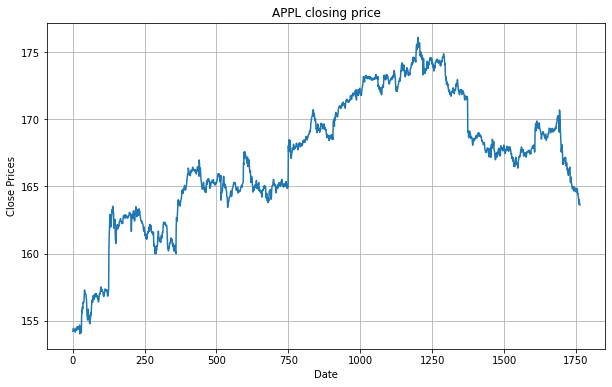

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('APPL closing price')
plt.show()

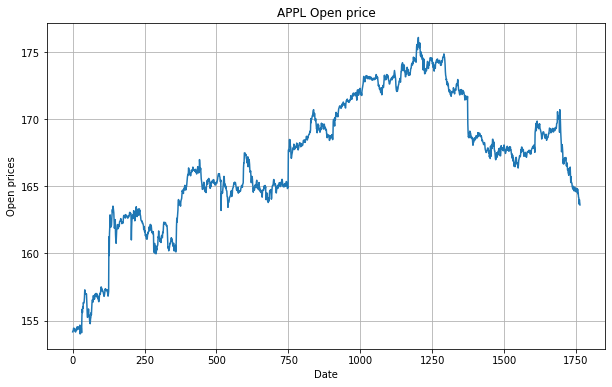

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open prices')
plt.plot(data['Open'])
plt.title('APPL Open price')
plt.show()

In [24]:
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(data['Close'])

(0.9006241351668466, True)

p value is 0.90 ,so the series is not stationary. 

p value should be less than 0.05


In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


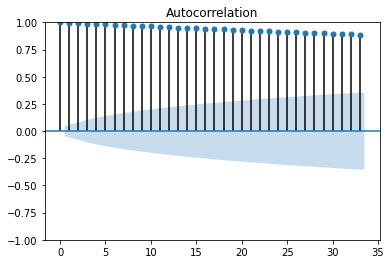

In [26]:
plot_acf(data[y_name].values)
plt.show()

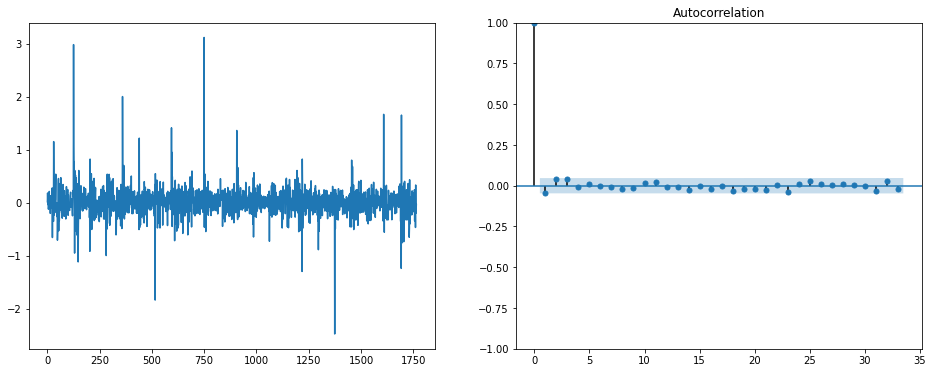

In [27]:
differnce1=data[y_name].diff().dropna()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,6))

ax1.plot(differnce1)
plot_acf(differnce1,ax=ax2)
plt.show()

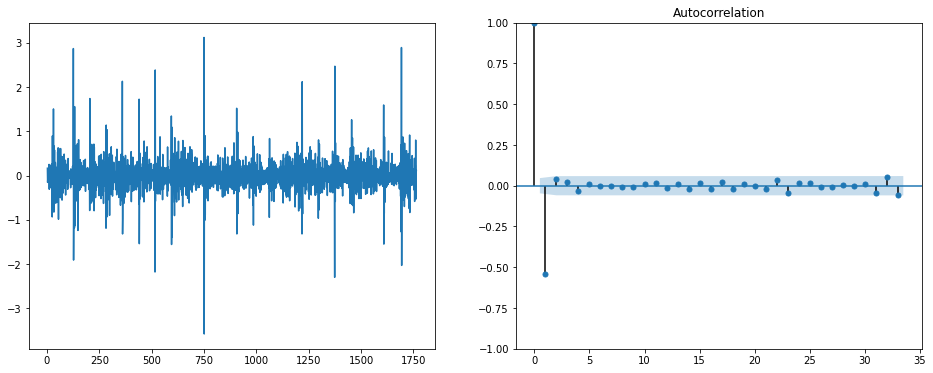

In [28]:
differnce2=data[y_name].diff().diff().dropna()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,6))

ax1.plot(differnce2)
plot_acf(differnce2,ax=ax2)
plt.show()

In [29]:
from pmdarima.arima.utils import ndiffs

In [31]:
ndiffs(data[y_name],test="adf")

1

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


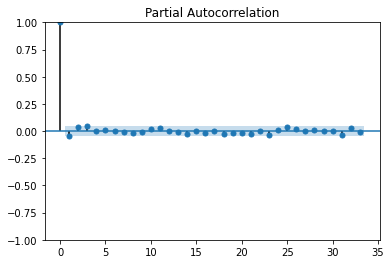

In [32]:
plot_pacf(differnce1)
plt.show()

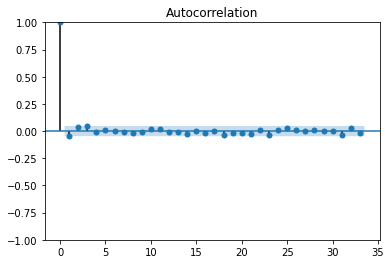

In [33]:
plot_acf(differnce1)
plt.show()

p=3
d=1
q=2


In [86]:
df=data[y_name]
# train_size=int((df.count()/100)*75)
train_size=50
train=df[:train_size]
# test_size=df.count()-train_size
test=df[-1715:-1706]

In [77]:
train_size,test_size,train_size+test_size

(50, 442, 492)

In [87]:
test

50    155.330002
51    155.315002
52    155.050003
53    155.410004
54    155.863693
55    155.330002
56    155.409897
57    155.270004
58    154.929993
Name: Close, dtype: float64

In [88]:
train

0     154.220001
1     154.235001
2     154.414993
3     154.440002
4     154.399994
5     154.384995
6     154.259995
7     154.201508
8     154.191696
9     154.149994
10    154.360001
11    154.259995
12    154.325500
13    154.452194
14    154.524994
15    154.320007
16    154.350006
17    154.419998
18    154.550003
19    154.444595
20    154.399902
21    154.419998
22    154.380005
23    154.394302
24    154.669907
25    154.009995
26    154.245499
27    154.309998
28    154.210007
29    154.455002
30    154.100006
31    155.250000
32    155.839996
33    155.604004
34    156.036194
35    155.910004
36    156.360001
37    156.279999
38    156.350006
39    156.404999
40    156.755005
41    157.289902
42    157.200699
43    157.009995
44    157.005005
45    156.994995
46    156.964996
47    156.699997
48    156.589996
49    155.880005
Name: Close, dtype: float64

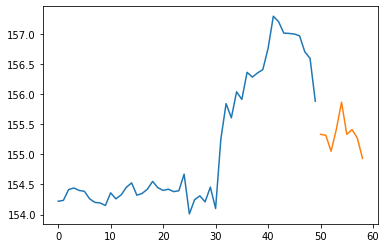

In [89]:
plt.plot(train)
plt.plot(test)

In [90]:
from pmdarima.arima.auto import auto_arima
model=auto_arima(train,max_p=3,max_d=1,max_q=2)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -9.157
Date:                Wed, 21 Sep 2022   AIC                             20.313
Time:                        15:10:55   BIC                             22.205
Sample:                             0   HQIC                            21.031
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0851      0.010      8.669      0.000       0.066       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                36.10
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               8.17   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
pred=pd.DataFrame(model.predict(n_periods=442),index=test.index)
pred.columns=['prediciton_y_name']
pred

,prediciton_y_name
50,155.880005
51,155.880005
52,155.880005
53,155.880005
54,155.880005
55,155.880005
56,155.880005
57,155.880005
58,155.880005


In [93]:
test

50    155.330002
51    155.315002
52    155.050003
53    155.410004
54    155.863693
55    155.330002
56    155.409897
57    155.270004
58    154.929993
Name: Close, dtype: float64

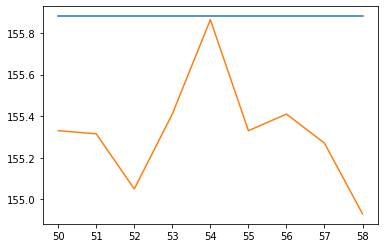

In [94]:
plt.plot(pred)
plt.plot(test)